In [12]:
import librosa
import numpy as np
import os
from numpy.linalg import norm
import matplotlib.pyplot as plt
from IPython.display import Audio

sr = 44100

In [13]:
!cd .. && python main.py compare.json

[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]


In [14]:
def load(filename, sr=44100):
    path = os.path.join("..", "exports", filename)
    y, _ = librosa.load(path, sr=sr)
    return y
    
def mel_spectrogram(y, sr=44100, n_fft=2048, hop_length=512, n_mels=128):
    S = librosa.feature.melspectrogram(
        y=y,
        sr=sr,
        n_fft=n_fft,
        hop_length=hop_length,
        n_mels=n_mels
    )
    
    S_db = librosa.power_to_db(S, ref=np.max)
    return S_db

def mse_similarity(S1, S2):
    # Alinear shapes (corta al mínimo tamaño común)
    min_frames = min(S1.shape[1], S2.shape[1])
    S1 = S1[:, :min_frames]
    S2 = S2[:, :min_frames]

    return np.mean((S1 - S2)**2)

def show_spectrogram(S_db, sr=44100):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_db, sr=sr, hop_length=512,
                             x_axis='time', y_axis='mel', cmap='magma')
    plt.colorbar(format='%+2.0f dB')
    plt.title("Mel Spectrogram")
    plt.tight_layout()
    plt.show()

def mfcc(audio):
    return librosa.feature.mfcc(y=audio, sr=44100, n_mfcc=13)

def show_mfcc(_mfcc):
    # Visualizar
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(_mfcc, x_axis='time')
    plt.colorbar()
    plt.title('MFCC')
    plt.show()

In [15]:
S1 = load('sound0.wav')
S2 = load('sound1.wav')

In [16]:
S1_mel = mel_spectrogram(S1)
S1_mfcc = mfcc(S1)

In [17]:
S2_mel = mel_spectrogram(S2)
S2_mfcc = mfcc(S2)

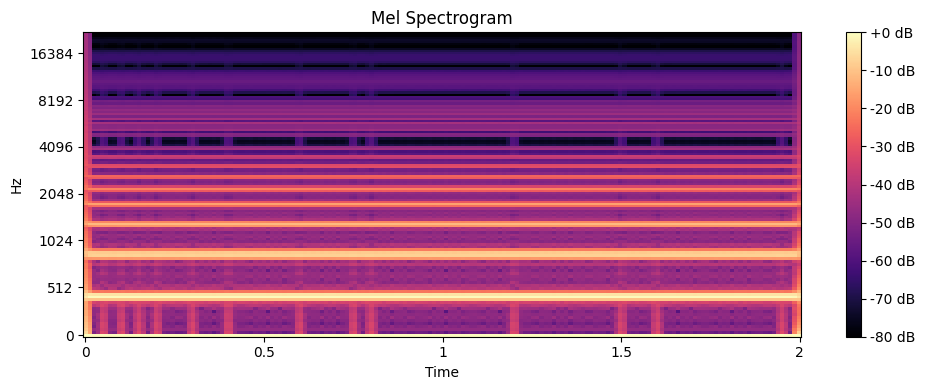

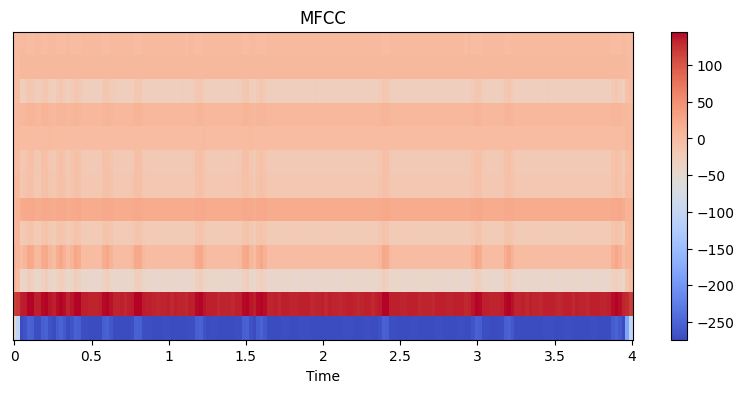

In [18]:
show_spectrogram(S1_mel)
show_mfcc(S1_mfcc)

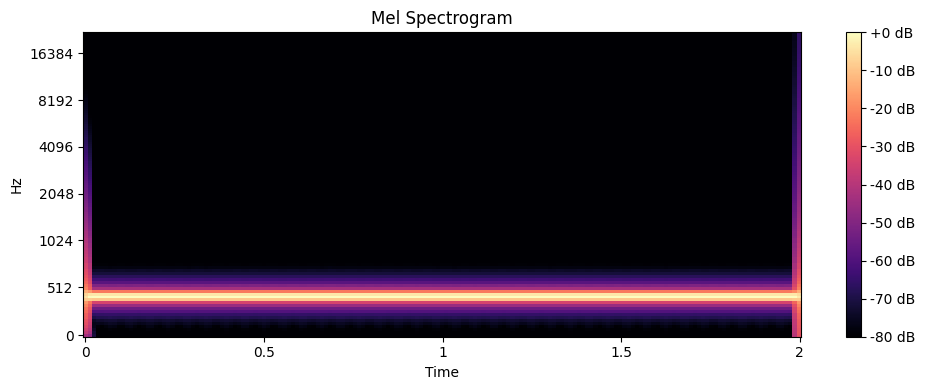

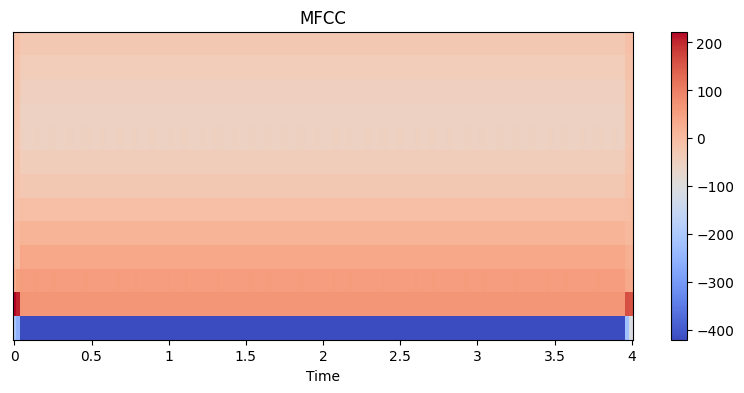

In [19]:
show_spectrogram(S2_mel)
show_mfcc(S2_mfcc)

In [20]:
print('MEL', np.mean((S1_mel - S2_mel) ** 2))
print('MFCC', np.mean((S1_mfcc - S2_mfcc) ** 2))

MEL 1048.8523
MFCC 3768.686


In [21]:
Audio(S1, rate=44100)

In [22]:
Audio(S2, rate=44100)

# misma frecuencia diferentes formas de onda. (440)
# tabla de similitud entre ondas

# azul parecido y rojo no parecida





# Tomar 5 notas en un piano. 5 notas . La 4 y dos en cada extremo. Lo mismo de arriba (4x4 para diferente frecuencia) (Ruido y sin ruido)
# Usar la misma escala de calor.

# Combinaciones (Sinusoidales). f1 con f2, f2 con f3, etcc..... Compararlas contra las otras 10 combinaciones. Tabla de 10*10. El mismo volumen a ambas.
# A0 A2 A4 A6 A8
# Escala de calor

# repetir todo eso con ruido y sin ruido. Medidas de ruido. PCNR

# Usar la misma escala de color